In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
from itertools import cycle
import re


In [21]:
# This is the flux calculator. It has nothing to do with samples or any of that
from scipy.interpolate import interp1d
# This is to get the original flux used:
import pickle
data = pickle.load(open('/home/jp/projects/icecube/flux_unfolding/tw_neutrino_flux_wsums_original.pckl'))

numu_pi =  ((data['sum_numu_from_p'] + data['sum_numubar_from_p'])*data['ecenters']**3)

numu_k =  ((data['sum_numu_from_k'] + data['sum_numubar_from_k']) *data['ecenters']**3)

nue =  ((data['sum_nue'] + data['sum_nuebar'])*data['ecenters']**3)


fpi = interp1d(data['ecenters'], numu_pi, kind='cubic' )
fk = interp1d(data['ecenters'], numu_k, kind='cubic' )
fe = interp1d(data['ecenters'], nue, kind='cubic')

#energies = np.linspace(0.3, 2.9)
energies = np.linspace(3., 980., 1000)

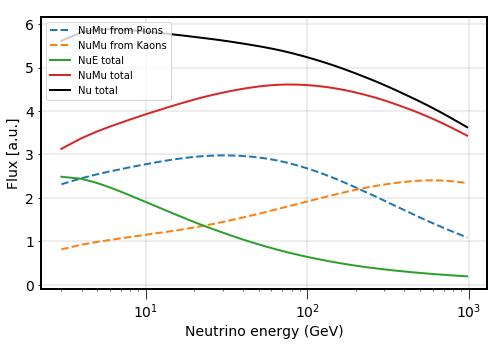

In [55]:
fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)

wf = energies**0.

## The injected MCEq flux
plt.plot(energies, fpi(energies)*wf, '--', label = 'NuMu from Pions')
plt.plot(energies, fk(energies)*wf, '--', label = 'NuMu from Kaons')
plt.plot(energies, fe(energies)*wf,  label = 'NuE total')
plt.plot(energies, (fpi(energies)+fk(energies))*wf, label = 'NuMu total')
plt.plot(energies, (fe(energies)+fpi(energies)+fk(energies))*wf,'-k', label = 'Nu total')

plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Flux [a.u.]')
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc=0)
#plt.ylim(3., 7.)


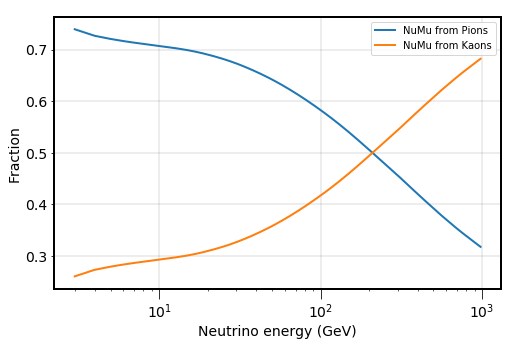

In [19]:

fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)

## The injected MCEq flux
plt.plot(energies, fpi(energies)/(fpi(energies)+fk(energies)), label = 'NuMu from Pions')
plt.plot(energies, fk(energies)/(fpi(energies)+fk(energies)), label = 'NuMu from Kaons')
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Fraction')
plt.xscale('log')
plt.legend(loc=0)

2.41465402934 0.414138003974


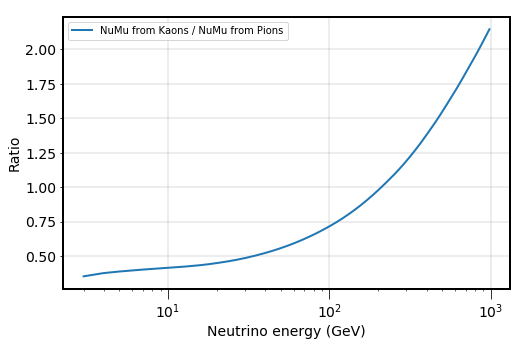

In [37]:
fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)

## The injected MCEq flux
plt.plot(energies, fk(energies)/fpi(energies), label = 'NuMu from Kaons / NuMu from Pions')
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Ratio')
plt.xscale('log')
plt.legend(loc=0)
print fpi(10.)/fk(10.), fk(10.)/fpi(10.)